In [1]:
import sys, os
sys.path.insert(0, os.path.abspath("../pyCudaPolygon"))
import pyCudaPolygon as pcp
import numpy as np
from matplotlib import pyplot as plt
from pyCudaPolygonLink import libpyCudaPolygon as lpcp


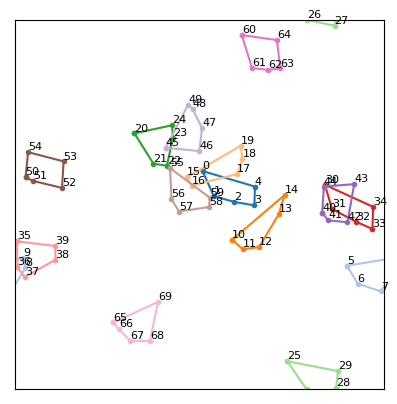

In [2]:
numPolygons = 14
n = 5
m = pcp.model(size = n * numPolygons, seed = 4)
m.setModelEnum("normal")
# Set all polygons to be equally coordinated
m.setECPolygons(n)
# Set random polygon vertices positions
m.setRandomPolygons()
# Make it so that all of the polygons have the same area
m.setMonoArea(phi = 0.1)
m.draw(numbering = True)
plt.show()

In [3]:
# Works fine
m.setMaxEdgeLength()
# use default max edge length by finding it within the simulation
# You can adjust this later.
m.initializeNeighborCells()
m.updateNeighborCells()
m.updateNeighbors(0.05)

In [4]:
intersections, starts, ends = m.getIntersections()

In [5]:
def unpack(val):
    """Unpack a 64-bit integer back into four 16-bit numbers."""
    nums = np.zeros(4)
    nums[3] = val & 0xFFFF
    nums[2] = (val >> 16) & 0xFFFF
    nums[1] = (val >> 32) & 0xFFFF
    nums[0] = (val >> 48) & 0xFFFF
    return nums  

In [6]:
ij = []
sij = []
for i in range(len(intersections)):
    sisjji = unpack(intersections[i])
    ij.append(sisjji[2:][::-1])
    sij.append(sisjji[0:2])
ij = np.array(ij, dtype = int)
sij = np.array(sij, dtype = int)

In [7]:
ij,sij

(array([[ 4, 16],
        [ 7, 36],
        [16,  0],
        [15, 59],
        [22, 45],
        [34, 42],
        [30, 43],
        [35,  9],
        [42, 31],
        [43, 34],
        [49, 23],
        [59, 16]]),
 array([[ 0,  3],
        [ 1,  7],
        [ 3,  0],
        [ 3, 11],
        [ 4,  9],
        [ 6,  8],
        [ 6,  8],
        [ 7,  1],
        [ 8,  6],
        [ 8,  6],
        [ 9,  4],
        [11,  3]]))

In [8]:
a = m.getPlayers()

In [9]:
for v in range(len(a)):
    l = (a[v]) & 0xFFFF
    k = (a[v] >> 16) & 0xFFFF
    j = (a[v] >> 32) & 0xFFFF
    i = (a[v] >> 48) & 0xFFFF
    print(i, j, k, l)

4 16 16 0
7 36 35 9
16 0 4 16
15 59 59 16
22 45 49 23
34 42 43 34
30 43 42 31
35 9 7 36
42 31 34 42
43 34 30 43
49 23 22 45
59 16 15 59


In [10]:
# That seems right...I think!
# Next we write the functional. Is there a way to get the behavior we want by repeatedly
# calling a void function that acts as an input?

# Call the function which will affect the relevant arrays (probably need to overload 
# and use enums)